In [8]:
import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper,BravyiKitaevMapper
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter, QuantumRegister

In [9]:
n = 8
N = 2*n
t=1
mu=1.5
U=3

In [10]:
def qOp(i,j):
    return FermionicOp(
    {
        "+_{i} -_{j}".format(i=i%N,j=j%N): 1.0,
    },
    num_spin_orbitals=N,
)

In [11]:
t_term = 0
mu_term =0
U_term =0
for i in range(n):
    t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
    mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
    U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
H = U * U_term - mu * mu_term - t * t_term

print(H)

Fermionic Operator
number spin orbitals=16, number terms=56
  3.0 * ( +_0 -_0 +_1 -_1 )
+ 3.0 * ( +_2 -_2 +_3 -_3 )
+ 3.0 * ( +_4 -_4 +_5 -_5 )
+ 3.0 * ( +_6 -_6 +_7 -_7 )
+ 3.0 * ( +_8 -_8 +_9 -_9 )
+ 3.0 * ( +_10 -_10 +_11 -_11 )
+ 3.0 * ( +_12 -_12 +_13 -_13 )
+ 3.0 * ( +_14 -_14 +_15 -_15 )
+ -1.5 * ( +_7 -_7 )
+ -1.5 * ( +_10 -_10 )
+ -1.5 * ( +_6 -_6 )
+ -1.5 * ( +_12 -_12 )
+ -1.5 * ( +_0 -_0 )
+ -1.5 * ( +_5 -_5 )
+ -1.5 * ( +_14 -_14 )
+ -1.5 * ( +_2 -_2 )
+ -1.5 * ( +_13 -_13 )
+ -1.5 * ( +_15 -_15 )
+ -1.5 * ( +_11 -_11 )
+ -1.5 * ( +_9 -_9 )
+ -1.5 * ( +_3 -_3 )
+ -1.5 * ( +_4 -_4 )
+ -1.5 * ( +_8 -_8 )
+ -1.5 * ( +_1 -_1 )
+ -1.0 * ( +_4 -_6 )
+ -1.0 * ( +_12 -_10 )
+ -1.0 * ( +_6 -_8 )
+ -1.0 * ( +_13 -_15 )
+ -1.0 * ( +_6 -_4 )
+ -1.0 * ( +_5 -_7 )
+ -1.0 * ( +_1 -_3 )
+ -1.0 * ( +_11 -_9 )
+ -1.0 * ( +_12 -_14 )
+ -1.0 * ( +_0 -_2 )
+ -1.0 * ( +_10 -_8 )
+ -1.0 * ( +_0 -_14 )
+ -1.0 * ( +_9 -_7 )
+ -1.0 * ( +_2 -_0 )
+ -1.0 * ( +_2 -_4 )
+ -1.0 * ( +_3 -_5 )
+ -1.0 * ( 

In [12]:
mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(H)
print(qubit_jw_op)

SparsePauliOp(['IIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZZIIII', 'IIIIIIIIZZIIIIII', 'IIIIIIZZIIIIIIII', 'IIIIZZIIIIIIIIII', 'IIZZIIIIIIIIIIII', 'ZZIIIIIIIIIIIIII', 'IIIIIIIIIYZYIIII', 'IIIIIIIIIXZXIIII', 'IIIXZXIIIIIIIIII', 'IIIYZYIIIIIIIIII', 'IIIIIIIYZYIIIIII', 'IIIIIIIXZXIIIIII', 'YZYIIIIIIIIIIIII', 'XZXIIIIIIIIIIIII', 'IIIIIIIIYZYIIIII', 'IIIIIIIIXZXIIIII', 'IIIIIIIIIIIIYZYI', 'IIIIIIIIIIIIXZXI', 'IIIIXZXIIIIIIIII', 'IIIIYZYIIIIIIIII', 'IYZYIIIIIIIIIIII', 'IXZXIIIIIIIIIIII', 'IIIIIIIIIIIIIYZY', 'IIIIIIIIIIIIIXZX', 'IIIIIXZXIIIIIIII', 'IIIIIYZYIIIIIIII', 'IYZZZZZZZZZZZZZY', 'IXZZZZZZZZZZZZZX', 'IIIIIIXZXIIIIIII', 'IIIIIIYZYIIIIIII', 'IIIIIIIIIIIYZYII', 'IIIIIIIIIIIXZXII', 'IIIIIIIIIIYZYIII', 'IIIIIIIIIIXZXIII', 'IIYZYIIIIIIIIIII', 'IIXZXIIIIIIIIIII', 'XZZZZZZZZZZZZZXI', 'YZZZZZZZZZZZZZYI'],
              coeffs=[-6.  +0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,
  0.75+0.j,  0.75+0.j,  0.75+0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.

In [7]:
from qiskit.algorithms import NumPyEigensolver
from qiskit.visualization import plot_histogram
from qiskit.opflow.primitive_ops import PauliSumOp, PauliOp

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=1)
qubit_jw_op1 = PauliSumOp(qubit_jw_op)
exact_result = exact_solver.compute_eigenvalues(qubit_jw_op1)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)

gvec = exact_result.eigenstates[0].primitive.data

print(bin(np.argmax(gvec)))
for i,g in enumerate(gvec):
    if np.abs(g) > 1e-10:
        print(np.abs(g))
        print(bin(i))
        print(bin(i).count("1")) #counts the number of filled orbitals

/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_19983/449054540.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import NumPyEigensolver
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_19983/449054540.py:6: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=1)
/var/folders/n_/1wl7_2l52

KeyboardInterrupt: 

In [ ]:
print(gs_energy)

-17.4666


In [ ]:
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator, Sampler
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import SPSA, COBYLA, QNSPSA, SLSQP

n = qubit_jw_op.num_qubits
est = Estimator()
ansatz = EfficientSU2(n)
optimizer = SPSA(maxiter = 500)
intermediate_info = []
params_info = []
def callback(eval_count,params,value,meta):
        intermediate_info.append(value)
        params_info.append(params)

vqe = VQE(est,ansatz,optimizer,callback = callback)


In [ ]:
eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue

In [ ]:
print(eigen)

-12.400620576995173


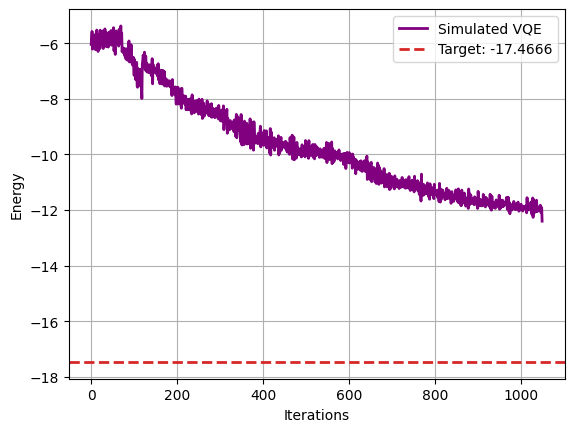

In [ ]:
import matplotlib.pyplot as plt
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [13]:
def opt_params(n = 4,t_term = 1.0,mu_term = 1.5,U_term = 3.0):
    for i in range(n):
        t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
        mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
        U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
    H = U * U_term - mu * mu_term - t * t_term
    mapper = JordanWignerMapper()
    qubit_jw_op = mapper.map(H)
    est = Estimator()
    ansatz = EfficientSU2(n)
    optimizer = SPSA(maxiter = 1000)
    intermediate_info = []
    params_info = []
    def callback(eval_count,params,value,meta):
            intermediate_info.append(value)
            params_info.append(params)
    vqe = VQE(est,ansatz,optimizer,callback = callback)
    eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
    return eigen

In [14]:
t_list = np.arange(0.5,2.0,0.05)
U_list = np.arange(1.0,5.0,0.1)
mu_list = U_list/2
ns_list = np.asarray([2,4,6,8])

In [15]:
import pandas as pd

def to_df(ts,Us,mus,ns):
pip inst    #The estimator model
    data = []
    tot = len(ns)*len(ts)*len(Us)*len(mus)
    count = 0
    for n in ns:
        for t in ts:
            for _U in Us:
                for mu in mus:
                    print(np.round(count/tot*100,3))
                    count += 1
                    opt_param = opt_params(n,t,mu,_U)
                    data.append([n,t,_U,mu,opt_param])
    df = pd.DataFrame(data,columns = ["n","t","U","mu","opt_params"])
    return df

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
c
df = to_df(t_list,U_list,mu_list,ns_list)

y_val= df["opt_params"]
x_data=df.drop("opt_params",axis=1)


X_train, X_eval,y_train,y_eval=train_test_split(x_data,y_val,test_size=0.3,random_state=101)

In [ ]:
scaler_model = MinMaxScaler()
scaler_model.fit(X_train)

X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

scaler_model.fit(X_eval)

X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)

In [ ]:
#Creating Feature Columns
feat_cols=[]
for cols in df.columns[:-1]:
    column=tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
print(feat_cols)

In [ ]:
#The estimator model
model=tf.estimator.DNNRegressor(hidden_units=[6,10,6],feature_columns=feat_cols)

#the input function
input_func=tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [ ]:
#Training the model
model.train(input_fn=input_func,steps=1000)

# Ansatz From: https://arxiv.org/pdf/2112.14077

## Notes:
start2: -7.4 descent
start: barren plateau around -4

In [261]:
from qiskit.circuit.library import SwapGate
from scipy.linalg import expm
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import HamiltonianGate

#eZZ gate
theta = 0.7809
Smat = SwapGate().to_matrix()
Sop = Operator(SwapGate())
#print(Sop)
#expS = expm(1j*Smat)
#def expSt(t):
#    return np.power(expS,t)

def eSwap(circ,i,j,t):
    eSt = HamiltonianGate(Sop,t,label = "eSwap")
    circ.append(eSt,[i,j])


def eZZ(circ,i,j,t):
    circ.cx(i,j)
    circ.rz(t,j)
    circ.cx(i,j)

def fij(circ,i,j,t):
    eSwap(circ,i,j,t)
    circ.cp(t,i,j)

def efSwap(circ,i,j,t):
    for k in range(j-1,i,-1):
        circ.cz(j,k)
    fij(circ,i,j,t)
    for k in range(i+1,j,1):
        circ.cz(j,k)

def hopping(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_h{r}".format(r=r),length = n)
    for i in range(n):
        efSwap(circ,i,(i+2)%n,t_s[i])

def interaction(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_i{r}".format(r=r),length = n//2)
    for i in range(0,n,2):
        eZZ(circ,i,i+1,t_s[i//2])


li = [i for i in range(0,n,4)]+[i+1 for i in range(0,n,4)]
def start(circ):
    n = circ.num_qubits
    for i in li:
        circ.x(i)
        circ.h(i+2)
        circ.cx(i,i+2)
    circ.barrier()

def start2(circ):
    n = circ.num_qubits
    li = [i for i in range(0,n//2,2)]+[n-1-i for i in range(0,n//2,2)]
    circ.x(li)
    circ.barrier()

def hopint(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
    

In [262]:
circ = QuantumCircuit(N)
start2(circ)
hopint(circ,reps = 5)
circ.draw(style = "mpl")


┌───┐ ░    ┌────────┐                                                »
 q_0: ┤ X ├─░────┤0       ├─■──────────────────────────────────────────────»
      └───┘ ░    │        │ │                 ┌────────┐                   »
 q_1: ──────░──■─┤  eSwap ├─┼────────────■────┤0       ├─■─────────────────»
      ┌───┐ ░  │ │        │ │P(t_h0[0])  │    │        │ │                 »
 q_2: ┤ X ├─░──■─┤1       ├─■────────────■──■─┤  eSwap ├─┼────────────■────»
      └───┘ ░    └────────┘                 │ │        │ │P(t_h0[1])  │    »
 q_3: ──────░───────────────────────────────■─┤1       ├─■────────────■──■─»
      ┌───┐ ░                                 └────────┘                 │ »
 q_4: ┤ X ├─░────────────────────────────────────────────────────────────■─»
      └───┘ ░                                                              »
 q_5: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
 q_6: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
 q_7: ──────░──────────────────────────────────────────────────────────────»
            ░                                                              »
 q_8: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
 q_9: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
q_10: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
q_11: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
q_12: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
q_13: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
q_14: ──────░──────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                              »
q_15: ┤ X ├─░──────────────────────────────────────────────────────────────»
      └───┘ ░                                                              »
«                                                                              »
« q_0: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_1: ────────────────────────────────────────────────────────────────────────»
«      ┌────────┐                                                              »
« q_2: ┤0       ├─■──────────────────────────────────────────■─────────────────»
«      │        │ │                 ┌────────┐             ┌─┴─┐┌─────────────┐»
« q_3: ┤  eSwap ├─┼────────────■────┤0       ├─■───────────┤ X ├┤ Rz(t_i0[1]) ├»
«      │        │ │P(t_h0[2])  │    │        │ │           └───┘└─────────────┘»
« q_4: ┤1       ├─■────────────■──■─┤  eSwap ├─┼─────────────■─────────────────»
«      └────────┘                 │ │        │ │P(t_h0[3])   │                 »
« q_5: ───────────────────────────■─┤1       ├─■─────────────■─────────■───────»
«                                   └────────┘                         │       »
« q_6: ────────────────────────────────────────────────────────────────■───────»
«                                                                              »
« q_7: ────────────────────────────────────────────────────────────────────────»
«                                                                              »
« q_8: ────────────────────────────────────────────────────────────────────────»
«      

In [263]:
ans1 = circ
print(ans1.num_qubits)

16


In [264]:
sampler = Sampler()
param_count = ans1.num_parameters
initial_point = np.random.random(param_count)*np.pi
#fidelity = QNSPSA.get_fidelity(ans1, sampler = sampler)
#optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = COBYLA(maxiter = 1000)
intermediate_info = []
params_info = []
vqe1 = VQE(est,ans1,optimizer,callback = callback,initial_point = initial_point)
eigen = vqe1.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

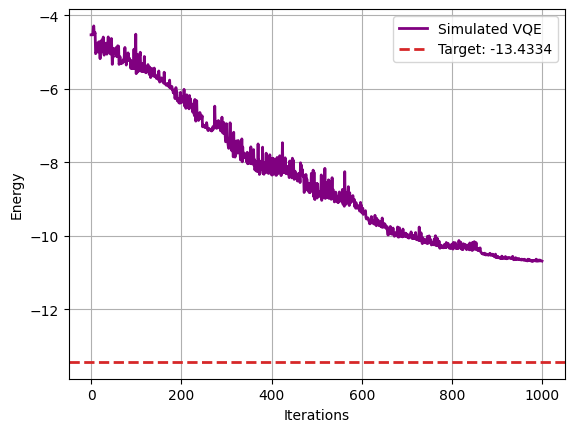

In [ ]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

In [ ]:
from qiskit.circuit import Gate
class ParticleSym(Gate):
    def __init__(self,params,rev = True,label = None):
        
        self._rev = rev
        self._params = list(params)
        
        if self._rev:
            self._params[1] = 0
        super().__init__("A",2,self._params)
    
    def _define(self):
        q = QuantumRegister(2, "q")
        circ = QuantumCircuit(q,name = self.name)
        p = self._params[1]+np.pi
        t = self._params[0]+np.pi/2
        circ.cx(1,0)
        '''theta = 2*self._params[0]
        lam = self._params[1]+np.pi
        phi = -self._params[1]
        circ.cu(theta,phi,lam,0,0,1)
        '''
        circ.rz(-p,1)
        circ.ry(-t,1)
        circ.cx(0,1)
        circ.ry(t,1)
        circ.rz(p,1)
        circ.cx(1,0)
        self.definition = circ

In [ ]:
from math import factorial 
from qiskit.circuit import ParameterVector
from qiskit.circuit import QuantumRegister

def comb(n,m):
    return factorial(n)//(factorial(n-m)*factorial(m))

mapping = [(i,(i+1)%N) for i in range(N)]+ [(i,(i+2)%N) for i in range(N)]

def dimer(circ,r=1):
    a2 = []
    for i in range(len(mapping)):
        a2.append(ParameterVector("ß"+str(i)+str(r),2))

    for i in range(len(mapping)):
        circ.append(ParticleSym(a2[i]),mapping[i]) 

In [ ]:
def hopintans(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
        dimer(circ,r)

In [ ]:
ans2 = QuantumCircuit(N)
start2(ans2)
dimer(ans2)
hopint(ans2,reps = 3)
ans2.draw(style = "mpl")

┌───┐ ░ ┌──────────────┐                                                »
 q_0: ┤ X ├─░─┤0             ├────────────────────────────────────────────────»
      └───┘ ░ │  A(ß01[0],0) │┌──────────────┐                                »
 q_1: ──────░─┤1             ├┤0             ├────────────────────────────────»
      ┌───┐ ░ └──────────────┘│  A(ß11[0],0) │┌──────────────┐                »
 q_2: ┤ X ├─░─────────────────┤1             ├┤0             ├────────────────»
      └───┘ ░                 └──────────────┘│  A(ß21[0],0) │┌──────────────┐»
 q_3: ──────░─────────────────────────────────┤1             ├┤0             ├»
      ┌───┐ ░                                 └──────────────┘│  A(ß31[0],0) │»
 q_4: ┤ X ├─░─────────────────────────────────────────────────┤1             ├»
      └───┘ ░                                                 └──────────────┘»
 q_5: ──────░─────────────────────────────────────────────────────────────────»
            ░                                                                 »
 q_6: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
 q_7: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
 q_8: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
 q_9: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
q_10: ──────░─────────────────────────────────────────────────────────────────»
      ┌───┐ ░                                                                 »
q_11: ┤ X ├─░─────────────────────────────────────────────────────────────────»
      └───┘ ░                                                                 »
«                                                                        »
« q_0: ──────────────────────────────────────────────────────────────────»
«      ┌───────────────┐                                                 »
« q_1: ┤0              ├─────────────────────────────────────────────────»
«      │               │                                                 »
« q_2: ┤  A(ß131[0],0) ├─────────────────────────────────────────────────»
«      │               │                ┌───────────────┐                »
« q_3: ┤1              ├────────────────┤0              ├────────────────»
«      └┬──────────────┤                │               │                »
« q_4: ─┤0             ├────────────────┤  A(ß151[0],0) ├────────────────»
«       │  A(ß41[0],0) │┌──────────────┐│               │                »
« q_5: ─┤1             ├┤0             ├┤1              ├────────────────»
«       └──────────────┘│  A(ß51[0],0) │└┬──────────────┤                »
« q_6: ─────────────────┤1             ├─┤0             ├────────────────»
«                       └──────────────┘ │  A(ß61[0],0) │┌──────────────┐»
« q_7: ──────────────────────────────────┤1             ├┤0             ├»
«                                        └──────────────┘│  A(ß71[0],0) │»
« q_8: ──────────────────────────────────────────────────┤1             ├»
«                                                        └──────────────┘»
« q_9: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«q_10: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«q_11: ──────────────────────────────────────────────────────────────────»
«                                                                        »
«                                                        ┌───────────────┐»
« q_0: ────────────────────────────────────────────────

In [ ]:
sampler = Sampler()
param_count = ans2.num_parameters
initial_point = np.random.random(param_count)*np.pi
#fidelity = QNSPSA.get_fidelity(ans2, sampler = sampler)
#optimizer = QNSPSA(fidelity,maxiter = 100)
optimizer = COBYLA(maxiter = 1000)
intermediate_info = []
params_info = []
vqe2 = VQE(est,ans2,optimizer,callback = callback,initial_point = initial_point)
eigen = vqe2.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)

-10.507689947184527


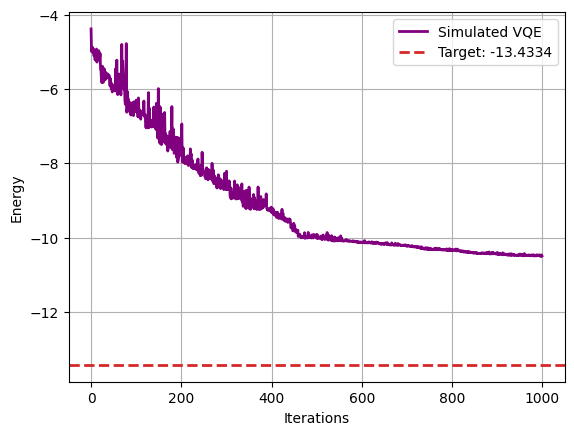

In [ ]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()